In [2]:
import igraph as ig
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
### Creation of dataset in csv

data = [[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],
        [2,2],[2,1],[2,2],[2,2],[2,2],[2,1],[2,2],[2,1],
        [3,1],[3,1],[3,1],[3,1],[3,1],[3,1],[3,1],[3,2],[3,2],[3,2],[3,2],[3,2],
        [3,2],[3,2],[3,2],[3,2],[3,2],[3,2],[3,2],[3,2],[3,2],[3,2],[3,2],[3,2],
        [3,2],[3,2],[3,2],[5,1],[5,1],[5,2],[5,2],[5,2],[5,2],[5,2],[5,2],[5,2],
        [5,2],[5,2],[5,2],[5,3],[5,3],[5,3],[5,3],[5,3],[5,5],[5,5],[5,5],[5,5],
        [5,5],[6,2],[6,2],[6,2],[6,2],[6,3],[6,3],[6,3],[6,3],[6,3],[6,3],[6,3],
        [6,3],[7,5],[7,5],[7,5],[7,5],[7,5],[7,5],[7,5],[7,5],[8,5],[8,5],[9,5],
        [9,5],[9,5],[9,5],[9,5],[9,5],[9,5],[9,5],[9,5],[9,5]
        ]

df = pd.DataFrame(np.array(data), columns=["uname", "rname"])
df["ACTION"] = 1
print(df.info())
df.to_csv("TOY-Rw.csv")
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   uname   100 non-null    int64
 1   rname   100 non-null    int64
 2   ACTION  100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB
None


,uname,rname,ACTION
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
95,9,5,1
96,9,5,1
97,9,5,1
98,9,5,1


In [7]:
# Ejemplo de dataframe de entrada
df = pd.DataFrame({
    'source': [1, 2, 2, 3, 3, 4, 4, 4, 4, 5, 5, 6, 7, 8],
    'target': [1, 1, 2, 1, 2, 1, 2, 3, 4, 2, 3, 4, 4, 4]
})

# Obtener identificadores únicos por tipo
unique_source = sorted(df['source'].unique())  # Nodos tipo 1
unique_target = sorted(df['target'].unique())  # Nodos tipo 2

# Crear nuevo mapeo de IDs
source_mapping = {old_id: new_id for new_id, old_id in enumerate(unique_source)}
start_target_id = len(unique_source)  # El primer ID del target será el último del source + 1
target_mapping = {old_id: new_id for new_id, old_id in enumerate(unique_target, start=start_target_id)}

# Aplicar el mapeo al dataframe
df_mapped = df.replace({'source': source_mapping, 'target': target_mapping})

# Contar la frecuencia correcta después del mapeo
source_counts = df_mapped['source'].value_counts().to_dict()
target_counts = df_mapped['target'].value_counts().to_dict()

# Fusionar ambas frecuencias asegurando que no falte ningún nodo
node_frequencies = {node: source_counts.get(node, 0) + target_counts.get(node, 0) for node in range(len(source_mapping) + len(target_mapping))}

# Contar la frecuencia de cada arista después del mapeo
edge_counts = df_mapped.groupby(['source', 'target']).size().to_dict()

# Crear el grafo bipartito en igraph
edges = list(edge_counts.keys())  # Lista de aristas sin duplicados
g = ig.Graph(edges=edges, directed=False)

# Etiquetar los nodos con su tipo
g.vs['type'] = [0] * len(source_mapping) + [1] * len(target_mapping)  # 0 para tipo 1, 1 para tipo 2

freq = [11, 8, 9, 22, 12, 8, 2, 10, 23, 39, 13, 25]
# Agregar el atributo de frecuencia de los nodos
g.vs['frequency'] = freq

weigts = [11, 3, 5, 7, 20, 2, 10, 5, 5, 4, 8, 8, 2, 10]
# Agregar el atributo de peso a las aristas
g.es['weight'] = weigts

# Mostrar nodos con sus frecuencias
print("Nodos y frecuencias:")
for v, f, z in zip(g.vs.indices, g.vs['frequency'], g.vs["type"]):
    print(f"Nodo {v}: Frecuencia {f} - Type {z}")

# Mostrar aristas con sus pesos
print("\nAristas y pesos:")
for edge, weight in zip(g.get_edgelist(), g.es['weight']):
    print(f"Arista {edge}: Peso {weight}")

print(f"Is bipartite? = {g.is_bipartite()}")


Nodos y frecuencias:
Nodo 0: Frecuencia 11 - Type 0
Nodo 1: Frecuencia 8 - Type 0
Nodo 2: Frecuencia 9 - Type 0
Nodo 3: Frecuencia 22 - Type 0
Nodo 4: Frecuencia 12 - Type 0
Nodo 5: Frecuencia 8 - Type 0
Nodo 6: Frecuencia 2 - Type 0
Nodo 7: Frecuencia 10 - Type 0
Nodo 8: Frecuencia 23 - Type 1
Nodo 9: Frecuencia 39 - Type 1
Nodo 10: Frecuencia 13 - Type 1
Nodo 11: Frecuencia 25 - Type 1

Aristas y pesos:
Arista (0, 8): Peso 11
Arista (1, 8): Peso 3
Arista (1, 9): Peso 5
Arista (2, 8): Peso 7
Arista (2, 9): Peso 20
Arista (3, 8): Peso 2
Arista (3, 9): Peso 10
Arista (3, 10): Peso 5
Arista (3, 11): Peso 5
Arista (4, 9): Peso 4
Arista (4, 10): Peso 8
Arista (5, 11): Peso 8
Arista (6, 11): Peso 2
Arista (7, 11): Peso 10
Is bipartite? = True


In [8]:
### Change color
color_map = []
for nodetype in g.vs["type"]:
    if nodetype == 0:
        color_map.append("red")
    else:
        color_map.append("blue")

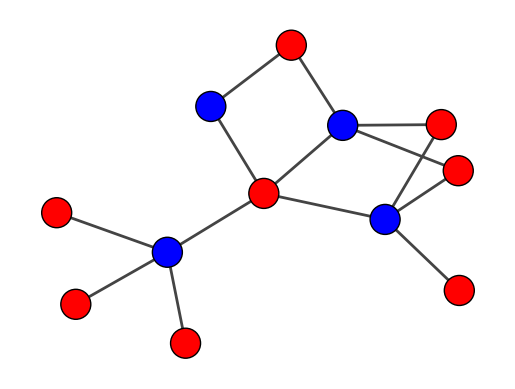

In [9]:
fig, ax = plt.subplots()
ig.plot(g, target=ax, vertex_color=color_map)

In [10]:
g.write_graphml("TOY-GRAPH.graphml")